<a href="https://colab.research.google.com/github/mayfluf/oficina-pretalab/blob/main/Limpeza_Dados_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise os dados públicos do GA

Dados Análise de Dados do Google Analytics:
Desvendando o Comportamento da Audiência

In [ ]:
import pandas as pd          # Biblioteca para manipulação e análise de dados (tabelas como DataFrames)
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos (plotagem)
import seaborn as sns        # Biblioteca de visualização baseada no matplotlib com gráficos mais atrativos
import numpy as np           # Biblioteca para computação numérica (operações matemáticas avançadas)
import re                    # Módulo para trabalhar com expressões regulares (manipulação de strings)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df_hearing = pd.read_excel('/content/public_ga_sample.xlsx')

In [ ]:
df_hearing

,date,channelGrouping,source,deviceCategory,browser,total visits,total pageviews,total timeOnSite,total users
0,20170528,Referral,away.vk.com,desktop,Chrome,2,2.0,NaN,2
1,20160914,Referral,google.de,desktop,Opera,1,1.0,NaN,1
2,20170608,Referral,phandroid.com,desktop,Chrome,2,4.0,19.0,2
3,20170722,Referral,int.search.tb.ask.com,desktop,Chrome,1,1.0,NaN,1
4,20170501,Referral,search.mysearch.com,desktop,Chrome,2,2.0,NaN,2
...,...,...,...,...,...,...,...,...,...
45001,20161206,Referral,productforums.google.com,mobile,Chrome,1,3.0,20.0,1
45002,20170108,Referral,productforums.google.com,desktop,Firefox,1,1.0,NaN,1
45003,20161211,Referral,productforums.google.com,mobile,Safari,1,2.0,44.0,1
45004,20170208,Referral,productforums.google.com,mobile,Chrome,1,1.0,NaN,1


# Tratamentos Dos Dados

In [ ]:
df_hearing.columns.tolist() #.tolist() - Converte esses nomes de colunas em uma lista Python

['date',
 'channel_grouping',
 'source',
 'device_category',
 'browser',
 'total_visits',
 'total_pageviews',
 'total_timeonsite',
 'total_users',
 'year']

In [ ]:
def string_to_snake_case(string):
    """Converte uma string para o formato snake_case.

    Transforma strings com espaços ou camelCase em snake_case (tudo em minúsculas
    com underscores separando as palavras).

    Parâmetros:
        string (str): A string a ser convertida

    Retorna:
        str: A string convertida para snake_case
    """

    # Substitui espaços em branco por underscores
    # Ex: "nome completo" → "nome_completo"
    string = re.sub(" ", "_", string)

    # Adiciona underscore entre letras minúsculas seguidas de maiúsculas (camelCase)
    # Ex: "nomeCompleto" → "nome_Completo"
    # O padrão \1_\2 mantém os caracteres originais e insere o underscore
    string = re.sub("([a-z0-9])([A-Z])", r"\1_\2", string)

    # Converte toda a string para minúsculas
    # Ex: "Nome_Completo" → "nome_completo"
    return string.lower()

In [ ]:
#Converter o nome das colunas para o estilo de snake_case
df_hearing.columns = [string_to_snake_case(column) for column in df_hearing.columns]  # string_to_snake_case() → Formata cada nome (tira espaços, coloca underscore, deixa tudo minúsculo)

df_hearing.columns

Index(['date', 'channel_grouping', 'source', 'device_category', 'browser',
       'total_visits', 'total_pageviews', 'total_time_on_site', 'total_users'],
      dtype='object')

In [ ]:
# Renomear a coluna 'nome_antigo' para 'nome_novo'
df_hearing = df_hearing.rename(columns={'total_time_on_site': 'total_timeonsite'})
df_hearing

,date,channel_grouping,source,device_category,browser,total_visits,total_pageviews,total_timeonsite,total_users
0,20170528,Referral,away.vk.com,desktop,Chrome,2,2.0,NaN,2
1,20160914,Referral,google.de,desktop,Opera,1,1.0,NaN,1
2,20170608,Referral,phandroid.com,desktop,Chrome,2,4.0,19.0,2
3,20170722,Referral,int.search.tb.ask.com,desktop,Chrome,1,1.0,NaN,1
4,20170501,Referral,search.mysearch.com,desktop,Chrome,2,2.0,NaN,2
...,...,...,...,...,...,...,...,...,...
45001,20161206,Referral,productforums.google.com,mobile,Chrome,1,3.0,20.0,1
45002,20170108,Referral,productforums.google.com,desktop,Firefox,1,1.0,NaN,1
45003,20161211,Referral,productforums.google.com,mobile,Safari,1,2.0,44.0,1
45004,20170208,Referral,productforums.google.com,mobile,Chrome,1,1.0,NaN,1


In [ ]:
#Contagem de linhas e colunas
df_hearing.shape #shape no Pandas/Numpy é um atributo que mostra a dimensão (tamanho) de um DataFrame ou array

(45006, 9)

In [ ]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              45006 non-null  int64  
 1   channel_grouping  45006 non-null  object 
 2   source            45006 non-null  object 
 3   device_category   45006 non-null  object 
 4   browser           45006 non-null  object 
 5   total_visits      45006 non-null  int64  
 6   total_pageviews   45005 non-null  float64
 7   total_timeonsite  32361 non-null  float64
 8   total_users       45006 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.1+ MB


In [ ]:
#Converter coluna de inteiros para datetime
df_hearing['date'] = pd.to_datetime(df_hearing['date'], format='%Y%m%d')

In [ ]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              45006 non-null  datetime64[ns]
 1   channel_grouping  45006 non-null  object        
 2   source            45006 non-null  object        
 3   device_category   45006 non-null  object        
 4   browser           45006 non-null  object        
 5   total_visits      45006 non-null  int64         
 6   total_pageviews   45005 non-null  float64       
 7   total_timeonsite  32361 non-null  float64       
 8   total_users       45006 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
# Aparecer 5 primeiros dataframe
df_hearing.head(10)

,date,channel_grouping,source,device_category,browser,total_visits,total_pageviews,total_timeonsite,total_users
0,2017-05-28,Referral,away.vk.com,desktop,Chrome,2,2.0,NaN,2
1,2016-09-14,Referral,google.de,desktop,Opera,1,1.0,NaN,1
2,2017-06-08,Referral,phandroid.com,desktop,Chrome,2,4.0,19.0,2
3,2017-07-22,Referral,int.search.tb.ask.com,desktop,Chrome,1,1.0,NaN,1
4,2017-05-01,Referral,search.mysearch.com,desktop,Chrome,2,2.0,NaN,2
5,2017-07-14,Social,lm.facebook.com,mobile,Safari,1,1.0,NaN,1
6,2017-01-09,Referral,support.google.com,desktop,Firefox,1,1.0,NaN,1
7,2016-08-26,Referral,seroundtable.com,desktop,Chrome,1,3.0,76.0,1
8,2017-07-24,Social,m.youtube.com,mobile,Chrome,1,1.0,NaN,1
9,2017-03-18,Referral,duckduckgo.com,desktop,Safari,1,1.0,NaN,1


In [ ]:
# Contagem total de NaN
total_nan = df_hearing.isna().sum()

#print
total_nan

,0
date,0
channel_grouping,0
source,0
device_category,0
browser,0
total_visits,0
total_pageviews,1
total_timeonsite,12645
total_users,0


In [ ]:
# Percentual de NaN em relação ao total de linhas
total_nan / len(df_hearing) * 100

,0
date,0.000000
channel_grouping,0.000000
source,0.000000
device_category,0.000000
browser,0.000000
total_visits,0.000000
total_pageviews,0.002222
total_timeonsite,28.096254
total_users,0.000000


In [ ]:
percentagem = 28.096254
percentagem_formatada = f"{percentagem:.1f}%"
print(percentagem_formatada)

28.1%


In [ ]:
# Verifique as colunas disponíveis no DataFrame
print(df_hearing.columns)

# Verifique se a coluna 'device_category' está presente
if 'device_category' in df_hearing.columns:
    # Contagem dos valores na coluna 'device_category'
    count = df_hearing['device_category'].value_counts()
    print(count)
else:
    print("A coluna 'device_category' não está presente no DataFrame.")

Index(['date', 'channel_grouping', 'source', 'device_category', 'browser',
       'total_visits', 'total_pageviews', 'total_timeonsite', 'total_users'],
      dtype='object')
device_category
desktop    24473
mobile     15073
tablet      5460
Name: count, dtype: int64


In [ ]:
# Analisar a distribuição dos NaNs por outras colunas
nan_distribution = df_hearing[df_hearing['total_timeonsite'].isna()]
print(nan_distribution.groupby('device_category').size())
print(nan_distribution.groupby('source').size())

device_category
desktop    6311
mobile     4659
tablet     1675
dtype: int64
source
(direct)              1881
(not set)               16
9to5google.com           1
Partners               734
ad.doubleclick.net       2
                      ... 
web.skype.com            1
wheretoget.it            1
yahoo                  293
yandex                   1
youtube.com           2103
Length: 222, dtype: int64


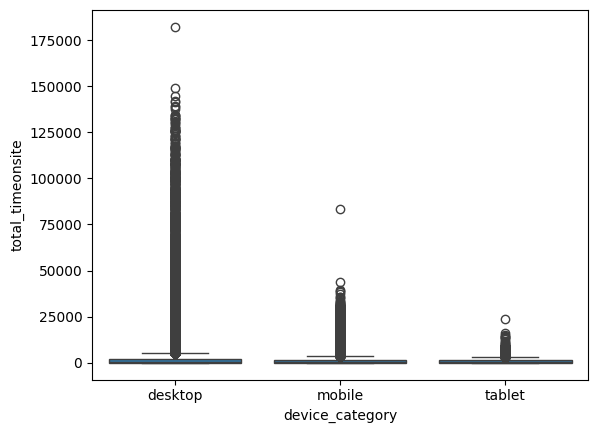

In [ ]:
sns.boxplot(x='device_category', y='total_timeonsite', data=df_hearing)
plt.show()

In [ ]:
# Selecionar apenas colunas numéricas
numeric_cols = df_hearing.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação
correlation_matrix = numeric_cols.corr()

# Exibir a correlação de total_timeonsite com outras variáveis
print(correlation_matrix['total_timeonsite'])


total_visits        0.802116
total_pageviews     0.977449
total_timeonsite    1.000000
total_users         0.780241
Name: total_timeonsite, dtype: float64


In [ ]:
# Contagem detalhada de fontes de tráfego
source_counts = df_hearing['source'].value_counts()

# Mostrar cada source e sua contagem
print("Detalhamento das Fontes de Tráfego:")
for source, count in source_counts.items():
    print(f"{source}: {count}")

# Número total de fontes de tráfego únicas
num_sources = source_counts.size
print(f'\nNúmero de fontes de tráfego únicas: {num_sources}')

Detalhamento das Fontes de Tráfego:
(direct): 10262
youtube.com: 6750
google: 5859
Partners: 2354
google.com: 1779
baidu: 1442
analytics.google.com: 1380
dfa: 1339
siliconvalley.about.com: 1012
qiita.com: 949
yahoo: 879
bing: 844
m.facebook.com: 750
quora.com: 683
reddit.com: 630
facebook.com: 563
t.co: 472
mail.google.com: 472
blog.golang.org: 454
sites.google.com: 416
l.facebook.com: 362
google.co.jp: 294
productforums.google.com: 290
groups.google.com: 283
dealspotr.com: 270
sashihara.jp: 243
ask: 207
plus.google.com: 193
docs.google.com: 188
phandroid.com: 175
google.co.uk: 168
duckduckgo.com: 161
m.baidu.com: 126
googleads.g.doubleclick.net: 117
lunametrics.com: 101
int.search.tb.ask.com: 98
optimize.google.com: 98
support.google.com: 84
search.mysearch.com: 72
outlook.live.com: 71
m.youtube.com: 63
s0.2mdn.net: 63
m.reddit.com: 58
adwords.google.com: 56
connect.googleforwork.com: 55
google.co.in: 49
hangouts.google.com: 49
lm.facebook.com: 48
google.de: 45
images.google: 43
gophe

O gráfico mostra as 20 fontes de tráfego (sites ou plataformas) que têm o maior número de usuários com base nos dados analisados.
Essas fontes de tráfego são classificadas em ordem decrescente de frequência. Ou seja, a barra mais alta representa a fonte de tráfego mais frequente, a segunda barra mais alta representa a segunda fonte de tráfego mais frequente, e assim por diante.

In [ ]:
# Identifique o índice da linha com NaN
linha_com_nan = df_hearing['total_pageviews'].isna().idxmax()
linha_com_nan

30583

In [ ]:
# Exclua a linha com NaN
df_hearing.drop(linha_com_nan, inplace=True)

In [ ]:
# Contagem total de NaN Pageviews
total_nan = df_hearing.isna().sum()

#print
total_nan

,0
date,0
channel_grouping,0
source,0
device_category,0
browser,0
total_visits,0
total_pageviews,0
total_timeonsite,12645
total_users,0


In [ ]:
#Verificar as informação
df_hearing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45005 entries, 0 to 45005
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              45005 non-null  datetime64[ns]
 1   channel_grouping  45005 non-null  object        
 2   source            45005 non-null  object        
 3   device_category   45005 non-null  object        
 4   browser           45005 non-null  object        
 5   total_visits      45005 non-null  int64         
 6   total_pageviews   45005 non-null  float64       
 7   total_timeonsite  32360 non-null  float64       
 8   total_users       45005 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
# Extrair o ano da coluna 'date'
df_hearing['year'] = df_hearing['date'].dt.year

# Obter os anos distintos
unique_years = df_hearing['year'].unique()

# Contar o número de anos distintos
num_years = len(unique_years)

print(f"Anos distintos na coluna 'date': {unique_years}")
print(f"Número de anos distintos: {num_years}")

Anos distintos na coluna 'date': [2017 2016]
Número de anos distintos: 2


In [ ]:
# Calcular número de navegadores únicos
num_browsers = df_hearing['browser'].nunique()
print(f"Número de navegadores únicos: {num_browsers}")

Número de navegadores únicos: 54
